In [1]:
! pip install sounddevice

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 1.1 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for CFFI>=1.0 from https://files.pythonhosted.org/packages/95/c8/ce05a6cba2bec12d4b28285e66c53cc88dd7385b102dea7231da3b74cfef/cffi-1.16.0-cp311-cp311-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.7/118.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 kB 2.8 MB/s eta 0:00:00a 0:00:01


# record audio

In [35]:
import sounddevice as sd

duration = 20  # seconds
fs = 44100  # sample rate

recording = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='int16')
sd.wait()


In [36]:
from scipy.io.wavfile import write
write('output.wav', fs, recording)

# reading the audio

In [61]:
import pyaudio

chunk = 1024  # Record in chunks of 1024 samples
sample_format = pyaudio.paInt16  # 16 bits per sample
channels = 1
fs = 44100  # Record at 44100 samples per second
seconds = 3
filename = "output.wav"

p = pyaudio.PyAudio()

stream = p.open(format=sample_format,
                channels=channels,
                rate=fs,
                frames_per_buffer=chunk,
                input=True)

frames = []

for i in range(0, int(fs / chunk * seconds)):
    data = stream.read(chunk)
    frames.append(data)

stream.stop_stream()
stream.close()
p.terminate()

In [63]:
import pyaudio
import wave

chunk = 1024  # Record in chunks of 1024 samples

filename = "output.wav"

p = pyaudio.PyAudio()
wf =  wave.open(filename, 'rb')
print(wf.getsampwidth())
stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
                channels=wf.getnchannels(),
                rate=wf.getframerate(),
                output=True)

frames = []

data = wf.readframes(chunk)

# play stream (3)
while len(data) > 0:
    stream.write(data)
    data = wf.readframes(chunk)
    frames.append(data)

stream.stop_stream()
stream.close()
p.terminate()

2


KeyboardInterrupt: 

In [9]:
type(frames[0])

bytes

## segmenting the audio

In [37]:
from pydub import AudioSegment
from pydub.silence import split_on_silence
import numpy as np

def split_audio_on_silence(audio_path, silence_threshold=-40):
    sound = AudioSegment.from_file(audio_path)
    

    chunks = split_on_silence(sound, silence_thresh=silence_threshold, min_silence_len = 3000)
    

    speech_segments = []
    for chunk in chunks:
        audio_data = np.array(chunk.get_array_of_samples())
        if np.max(np.abs(audio_data)) > 0:  # Check if the chunk contains speech
            speech_segments.append(chunk)

    return speech_segments

def save_segments(segments, output_folder):
    for i, segment in enumerate(segments):
        segment.export(f"{output_folder}/speech_segment_{i}.wav", format="wav")


In [40]:
audio_path = "output.wav"
output_folder = "output_folder"

# Adjust the silence_threshold and chunk_duration as needed
speech_segments = split_audio_on_silence(audio_path, silence_threshold=-40)

# Save the speech segments to the output folder
save_segments(speech_segments, output_folder)


1551


In [54]:
from pydub import AudioSegment

def db_to_float(db, using_amplitude=True):
    db = float(db)
    if using_amplitude:
        return 10 ** (db / 20)
    else:  # using power
        return 10 ** (db / 10)
    
def split(audio_path, min_silience):
    sound = AudioSegment.from_file(audio_path)
    min_silience = min_silience
    silence_thresh = db_to_float(silence_thresh) * sound.max_possible_amplitude
    seg_len = len(sound)
    last_slice_start = seg_len - min_silience
    slice_starts = range(0, last_slice_start + 1, 1)
    rms = []
    for i in slice_starts:
        audio_slice = sound[i:i + min_silience]

        rms.append(audio_slice.rms)
                
    return rms



1551
1551


<function matplotlib.pyplot.show(close=None, block=None)>

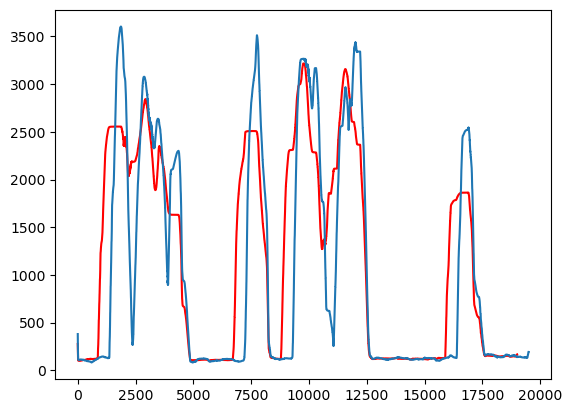

In [56]:
import matplotlib.pyplot as plt
audio_path = "output.wav"
rms = split(audio_path, 1000)
plt.plot(rms, c = 'red')
rms = split(audio_path, 500)

plt.plot(rms)
plt.show